In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Initialize weights
w0 = np.random.uniform(-1/4, 1/4)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)

num_points = 100
S = np.random.uniform(-1, 1, (num_points, 2))

w = np.array([w0, w1, w2])
condition1 = w[0] * S[:, 0] + w[1] * S[:, 1] + w[2] >= 0
condition2 = w[0] * S[:, 0] + w[1] * S[:, 1] + w[2] < 0

S1 = S[condition1]
S2 = S[condition2]

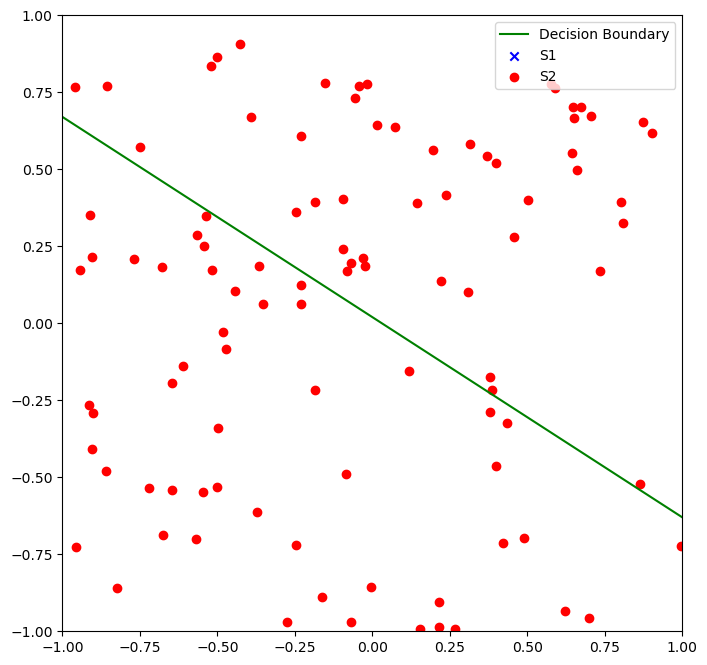

In [42]:
x1_line = np.array([-1, 1]) 
x2_line = (-w[1] * x1_line - w[0]) / w[2]
plt.figure(figsize=(8, 8))

plt.plot(x1_line, x2_line, color='green', label='Decision Boundary')

plt.scatter(S1[:, 0], S1[:, 1], color='blue', marker='x', label='S1')
plt.scatter(S2[:, 0], S2[:, 1], color='red', marker='o', label='S2')

plt.legend(loc='upper right')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

--- Starting Experiment for n = 100 ---
True Weights (w): [-0.25091976  0.90142861  0.46398788]



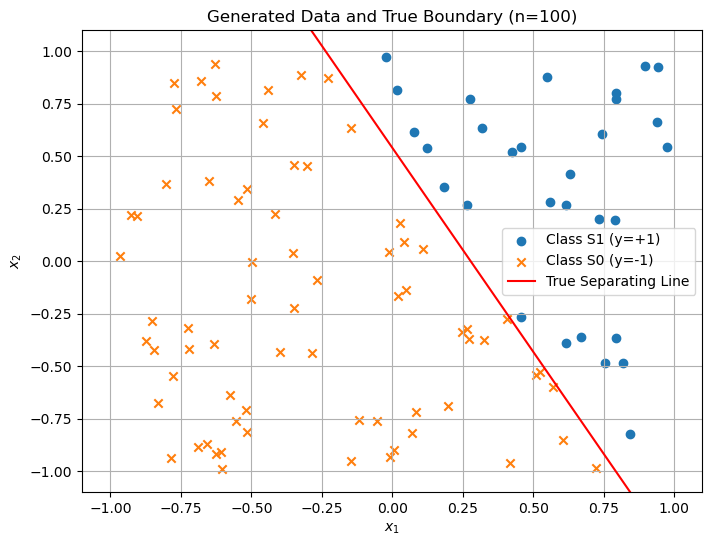

Initial Training Weights (w'): [ 0.79710838  0.21285812 -0.9816059 ]
Initial misclassifications with w': 63

--- Results for eta = 1 ---
Converged in 14 epochs.
Final Weights: [-2.20289162  7.04619774  3.11659801]
--- Results for eta = 10 ---
Converged in 10 epochs.
Final Weights: [-19.20289162  61.24820296  29.77690362]
--- Results for eta = 0.1 ---
Converged in 6 epochs.
Final Weights: [-0.20289162  0.67984641  0.40147292]


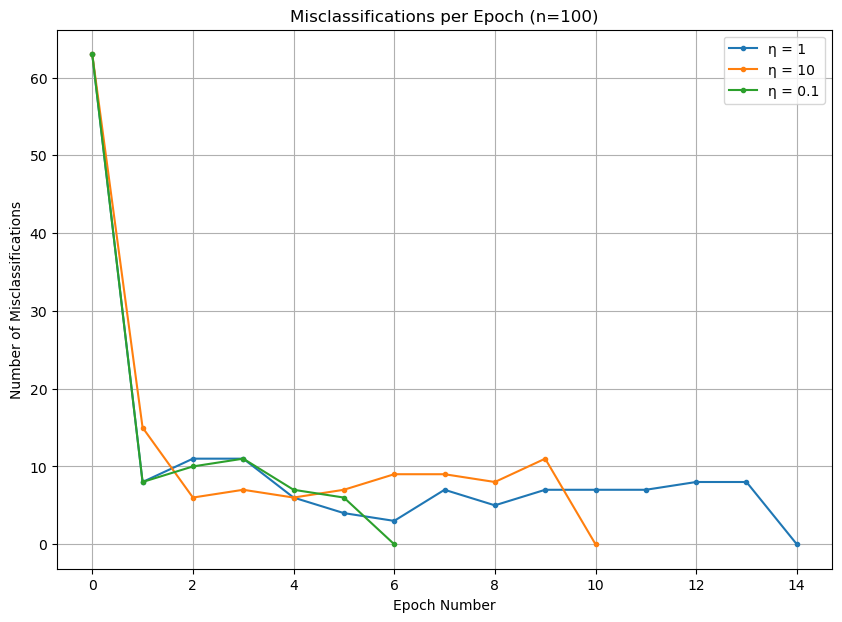

--- Starting Experiment for n = 1000 ---
True Weights (w): [ 0.34455712 -0.0238432   0.65099035]



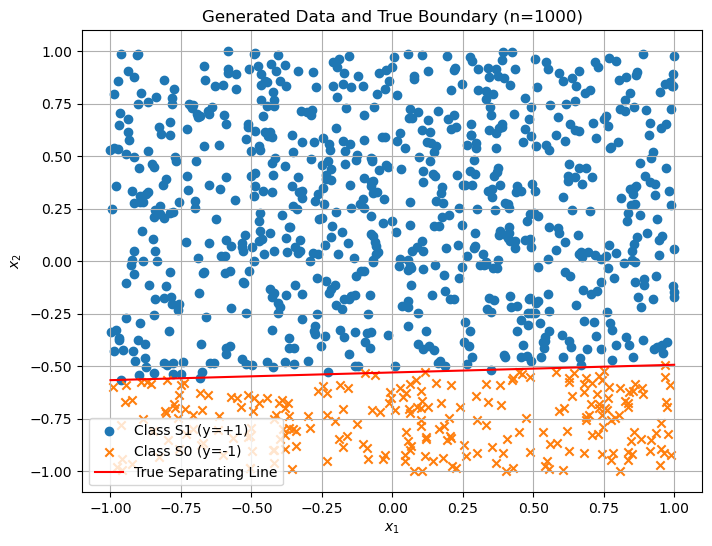

Initial Training Weights (w'): [ 0.81487868 -0.09385287 -0.66202024]
Initial misclassifications with w': 239

--- Results for eta = 1 ---
Converged in 133 epochs.
Final Weights: [15.81487868 -1.20111975 29.87417139]
--- Results for eta = 10 ---
Converged in 212 epochs.
Final Weights: [180.81487868 -13.74566345 341.45644587]
--- Results for eta = 0.1 ---
Converged in 44 epochs.
Final Weights: [ 1.11487868 -0.08205181  2.10503072]


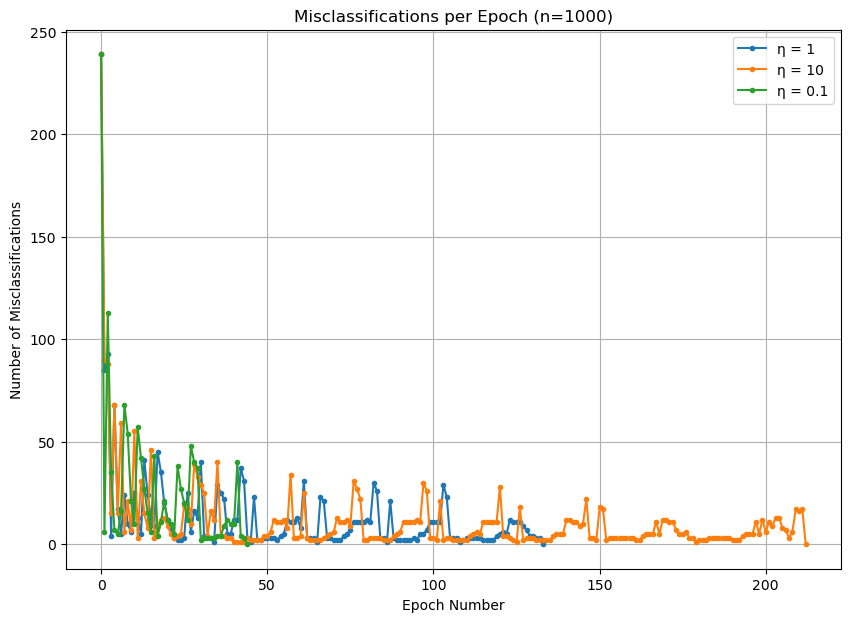

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def run_perceptron_experiment(n_samples, initial_seed=42):
    """
    Runs the full perceptron experiment for a given number of samples.
    
    Args:
        n_samples (int): The number of data points to generate (n).
        initial_seed (int): Seed for random number generation for reproducibility.
    """
    print(f"--- Starting Experiment for n = {n_samples} ---")
    np.random.seed(initial_seed)

    # (a, b, c) Pick true weights w0, w1, w2 uniformly at random on [-1, 1].
    w_true = np.random.uniform(-1, 1, 3) # [w0, w1, w2]
    print(f"True Weights (w): {w_true}\n")

    # (d) Pick n vectors x uniformly at random on [-1, 1]^2.
    # We create an (n x 3) matrix where the first column is the bias term (1).
    X_points = np.random.uniform(-1, 1, (n_samples, 2))
    X_b = np.c_[np.ones(n_samples), X_points]

    # (e, f) Label the data points into S1 and S0.
    # S1 (target=1) if w^T * x >= 0
    # S0 (target=-1) if w^T * x < 0
    dot_products = X_b @ w_true
    targets = np.where(dot_products >= 0, 1, -1)

    # (g) Plot the separating line and data points.
    S1 = X_points[targets == 1]
    S0 = X_points[targets == -1]

    plt.figure(figsize=(8, 6))
    plt.scatter(S1[:, 0], S1[:, 1], marker='o', label='Class S1 (y=+1)')
    plt.scatter(S0[:, 0], S0[:, 1], marker='x', label='Class S0 (y=-1)')

    # To plot the line w0 + w1*x1 + w2*x2 = 0, we solve for x2:
    # x2 = (-w0 - w1*x1) / w2
    x1_line = np.linspace(-1, 1, 100)
    if w_true[2] != 0: # Avoid division by zero
        x2_line = (-w_true[0] - w_true[1] * x1_line) / w_true[2]
        plt.plot(x1_line, x2_line, 'r-', label='True Separating Line')

    plt.title(f'Generated Data and True Boundary (n={n_samples})')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()

    # (h.ii) Pick initial training weights w' at random.
    # This is done once and reused for all learning rates.
    w_initial = np.random.uniform(-1, 1, 3)
    print(f"Initial Training Weights (w'): {w_initial}")

    # (h.iii) Record initial number of misclassifications.
    y_pred_initial = np.where(X_b @ w_initial >= 0, 1, -1)
    initial_misclass = np.sum(y_pred_initial != targets)
    print(f"Initial misclassifications with w': {initial_misclass}\n")

    learning_rates = [1, 10, 0.1]
    histories = {}

    for eta in learning_rates:
        # (h) Use the perceptron training algorithm.
        w_train = w_initial.copy() # Reset weights for each eta
        misclass_history = [initial_misclass]
        
        epoch = 0
        max_epochs = 1000 # Safety break for non-convergence
        
        while misclass_history[-1] > 0 and epoch < max_epochs:
            epoch += 1
            for i in range(n_samples):
                # Calculate prediction: y = sign(w^T * x)
                activation = w_train @ X_b[i]
                
                # Check for misclassification: y != t
                # A more stable check is if (activation * target) is negative.
                if activation * targets[i] <= 0:
                    # Update rule: w_new = w_old + eta * t_i * x_i
                    w_train += eta * targets[i] * X_b[i]
            
            # (h.v, h.vi) Record misclassifications after each epoch
            current_preds = np.where(X_b @ w_train >= 0, 1, -1)
            misclass_count = np.sum(current_preds != targets)
            misclass_history.append(misclass_count)
        
        histories[eta] = misclass_history
        print(f"--- Results for eta = {eta} ---")
        print(f"Converged in {epoch} epochs.")
        # (h.vii) Write down final weights.
        print(f"Final Weights: {w_train}")

    # (i, j, k) Draw a graph showing epoch number vs. misclassifications.
    plt.figure(figsize=(10, 7))
    for eta, history in histories.items():
        plt.plot(range(len(history)), history, marker='.', label=f'η = {eta}')
    
    plt.title(f'Misclassifications per Epoch (n={n_samples})')
    plt.xlabel('Epoch Number')
    plt.ylabel('Number of Misclassifications')
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Main execution ---
# Run for n=100
run_perceptron_experiment(n_samples=100, initial_seed=42)

# (n) Run for n=1000
run_perceptron_experiment(n_samples=1000, initial_seed=99)